In [35]:
import pandas as pd
import seaborn as sns
import os
import utils
import matplotlib.pyplot as plt
import seaborn.objects as so
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
data = pd.read_csv(os.path.join('data','cleaned_responses.csv'))
if not os.path.exists('figures'):
    os.makedirs('figures') #for outputs

In [37]:
df_grouped = utils.make_counts_per_multiselect_group(data,
                                         single_select_col= 'Single_Role',
                                         multi_select_col= 'How do you generally go about solving an image analysis problem? Check the approach(es) you use the most.')
df_grouped_PS = utils.make_counts_per_multiselect_group(data.loc[data['Science_Cat']=='Physical Sciences'],
                                         single_select_col= 'Single_Role',
                                         multi_select_col= 'How do you generally go about solving an image analysis problem? Check the approach(es) you use the most.')
df_grouped_LS = utils.make_counts_per_multiselect_group(data.loc[data['Science_Cat']=='Life Sciences'],
                                         single_select_col= 'Single_Role',
                                         multi_select_col= 'How do you generally go about solving an image analysis problem? Check the approach(es) you use the most.')

In [38]:
# allowed free-text entries so definining provided responses
prov_resps = ['Sit down with a tool I know and start playing with the data',
              'Ask a large language model',
              'Ask a friend or colleague to help me',
              'Look up solutions generally on the internet (Google)',
            'Look up solutions in the scientific literature',
            'Look up solutions on a particular website (please list below)',
            'Look up or ask on forum.image.sc'
              ]

In [39]:
# free responses not being plotted
free_resps = [x for x in df_grouped.columns if x not in prov_resps and x != 'Single_Role' and x!='']
print ('Count free responses with "Slack"', len([x for x in free_resps if 'slack' in x.lower()]))
print ('Count free responses with "Stack Overflow"', len([x for x in free_resps if 'stack' in x.lower()]))
print ('Count free responses with "Researchgate"', len([x for x in free_resps if 'gate' in x.lower()]))
free_resps

Count free responses with "Slack" 2
Count free responses with "Stack Overflow" 5
Count free responses with "Researchgate" 2


['Look for solutions on stackoverflow',
 'Neubias You Tube channel',
 'tool specific youtube videos',
 'Stack overflow ',
 'lightsheet Slack community',
 'try to read documentations of the libraries/languages',
 'I am almost unable to analyse my images',
 'stack',
 'Ask the community on EMofCTO Slack',
 'Robert Haase lectures',
 'etc.',
 'Matlab website',
 'Develop solution with python',
 'contact people with more experience using the image analysis software (asking questions in comment of YouTube tutorial etc)',
 'researchgate',
 "ask a RA in the lab to figure it out (I'm a PI prima donna)",
 'develop my own dedicated solution',
 'discuss with others.',
 'Research Gate',
 'I use Olympus Dimension Software',
 'image.sc',
 'Stackoverflow',
 'Stack overflow',
 'I assess the quality of the data acquired and determine if it is suitable for further analysis. ',
 'biii.eu',
 'Github',
 'Let it sit for a while and think in the background',
 'Develop my own code/tools',
 'see how the analysis 

In [40]:
df_grouped = df_grouped[['Single_Role']+[x for x in df_grouped.columns if x in prov_resps]]
df_grouped_PS = df_grouped_PS[['Single_Role']+[x for x in df_grouped_PS.columns if x in prov_resps]]
df_grouped_LS = df_grouped_LS[['Single_Role']+[x for x in df_grouped_LS.columns if x in prov_resps]]
df_grouped

,Single_Role,Ask a large language model,Look up solutions in the scientific literature,Look up solutions on a particular website (please list below),Ask a friend or colleague to help me,Look up or ask on forum.image.sc,Look up solutions generally on the internet (Google),Sit down with a tool I know and start playing with the data
0,Clinician,1.0,2.0,0.0,2.0,1.0,3.0,4.0
1,Facility Director/Manager,8.0,31.0,4.0,22.0,21.0,31.0,59.0
2,Faculty/Staff,38.0,91.0,15.0,73.0,84.0,104.0,159.0
3,Postdoctoral Fellow,29.0,37.0,6.0,38.0,31.0,58.0,69.0
4,Principle Investigator,9.0,24.0,3.0,12.0,16.0,26.0,45.0
5,Student,36.0,50.0,8.0,49.0,34.0,66.0,77.0


/Users/eweisbar/miniforge3/envs/run_stuff/lib/python3.9/site-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (12) than needed (7), which may not be intended.
  warnings.warn(message, UserWarning)


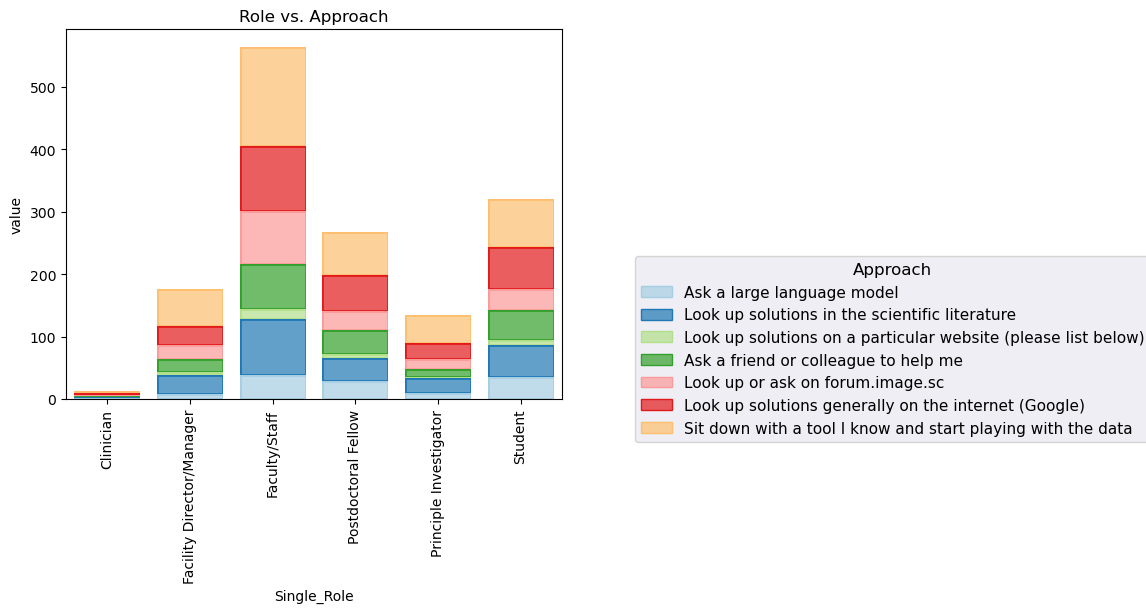

In [41]:
utils.plot_single_vs_multi(df_grouped,
                           legend_title = 'Approach',
                           plottitle = 'Role vs. Approach',
                           plot_filename=os.path.join('figures','Role_vs_Approach.png')
                           )

/Users/eweisbar/miniforge3/envs/run_stuff/lib/python3.9/site-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (12) than needed (7), which may not be intended.
  warnings.warn(message, UserWarning)


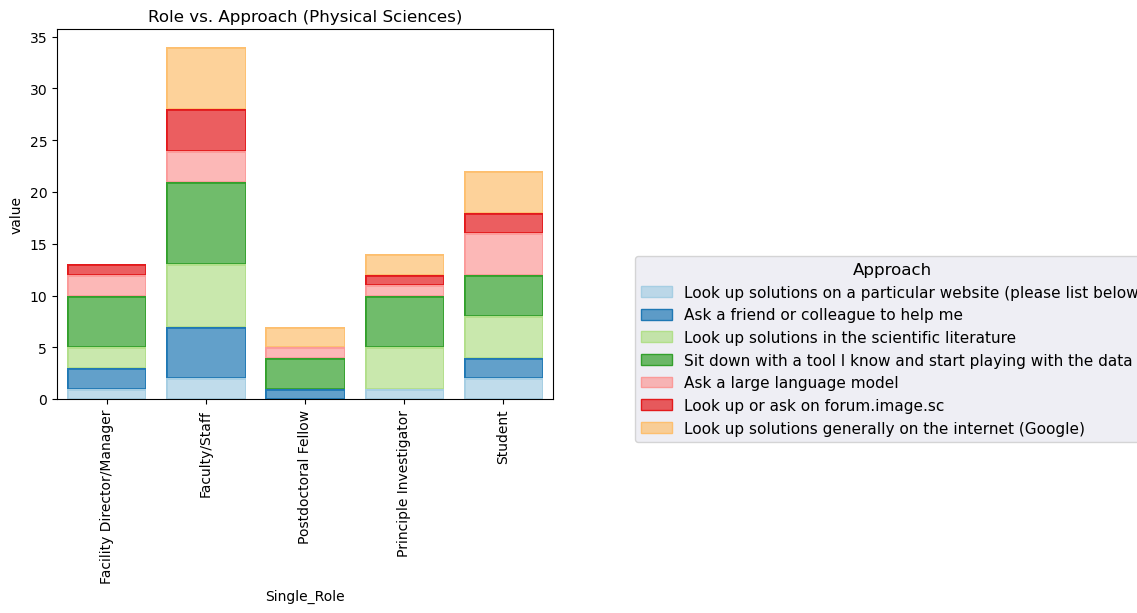

In [42]:
utils.plot_single_vs_multi(df_grouped_PS,
                           legend_title = 'Approach',
                           plottitle = 'Role vs. Approach (Physical Sciences)',
                           plot_filename=os.path.join('figures','Role_vs_Approach_PS.png')
                           )

/Users/eweisbar/miniforge3/envs/run_stuff/lib/python3.9/site-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (12) than needed (7), which may not be intended.
  warnings.warn(message, UserWarning)


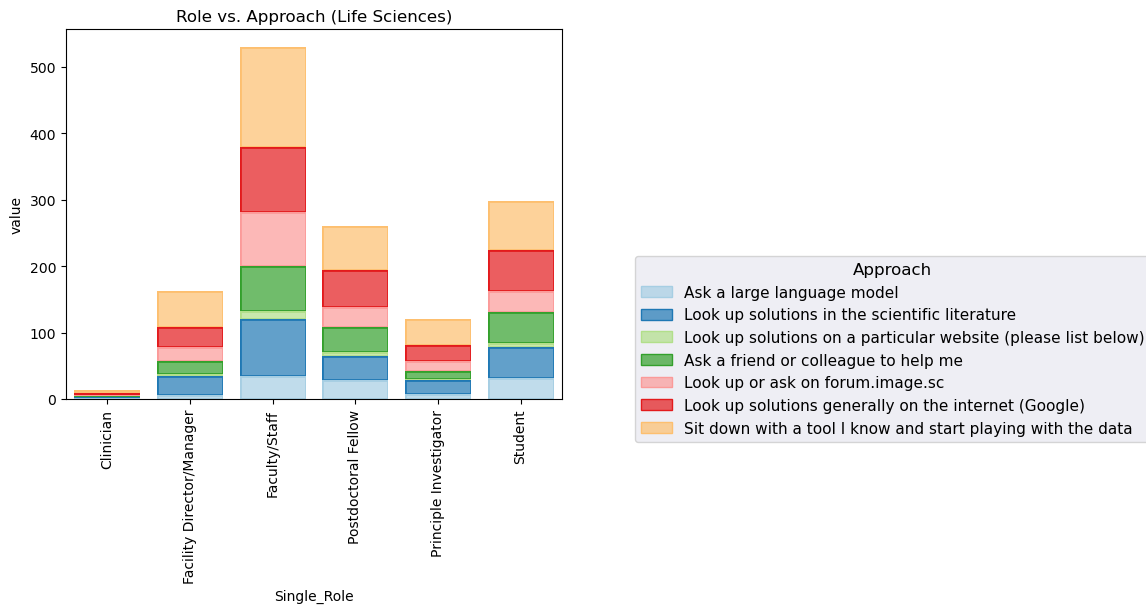

In [43]:
utils.plot_single_vs_multi(df_grouped_LS,
                           legend_title = 'Approach',
                           plottitle = 'Role vs. Approach (Life Sciences)',
                           plot_filename=os.path.join('figures','Role_vs_Approach_LS.png')
                           )

/Users/eweisbar/miniforge3/envs/run_stuff/lib/python3.9/site-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (12) than needed (6), which may not be intended.
  warnings.warn(message, UserWarning)


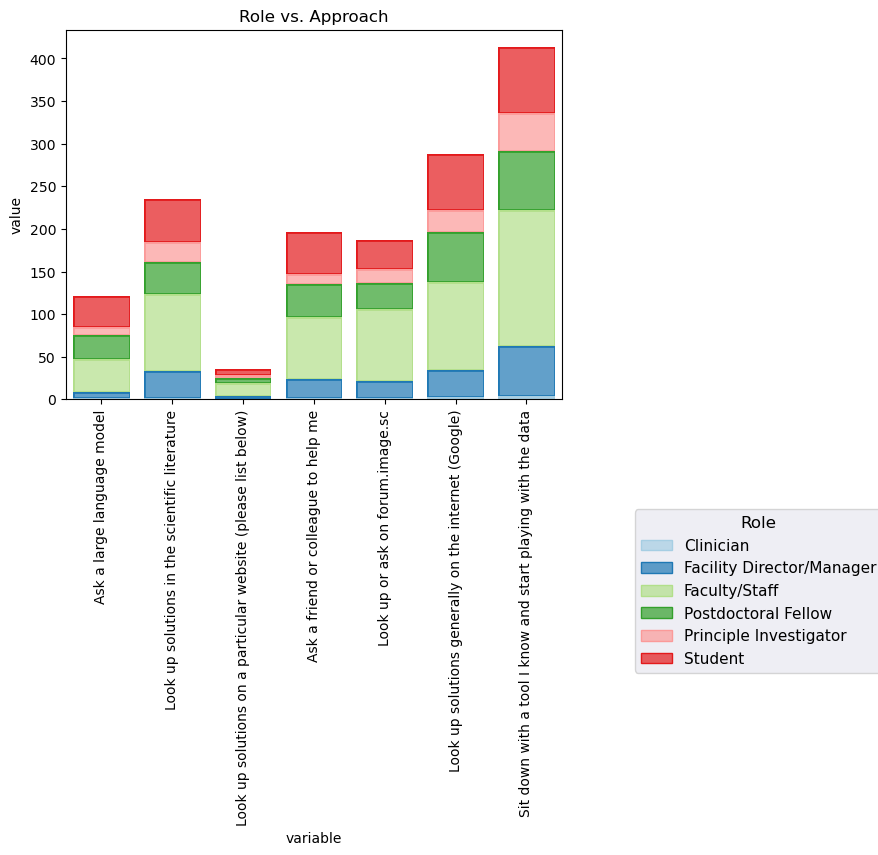

In [44]:
utils.plot_single_vs_multi(df_grouped,
                           legend_title = 'Role',
                           plottitle = 'Role vs. Approach',
                           plot_filename=os.path.join('figures','Role_vs_Approach_byRole.png'),
                           groupbyfirstcol=False
                           )

/Users/eweisbar/miniforge3/envs/run_stuff/lib/python3.9/site-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (12) than needed (6), which may not be intended.
  warnings.warn(message, UserWarning)


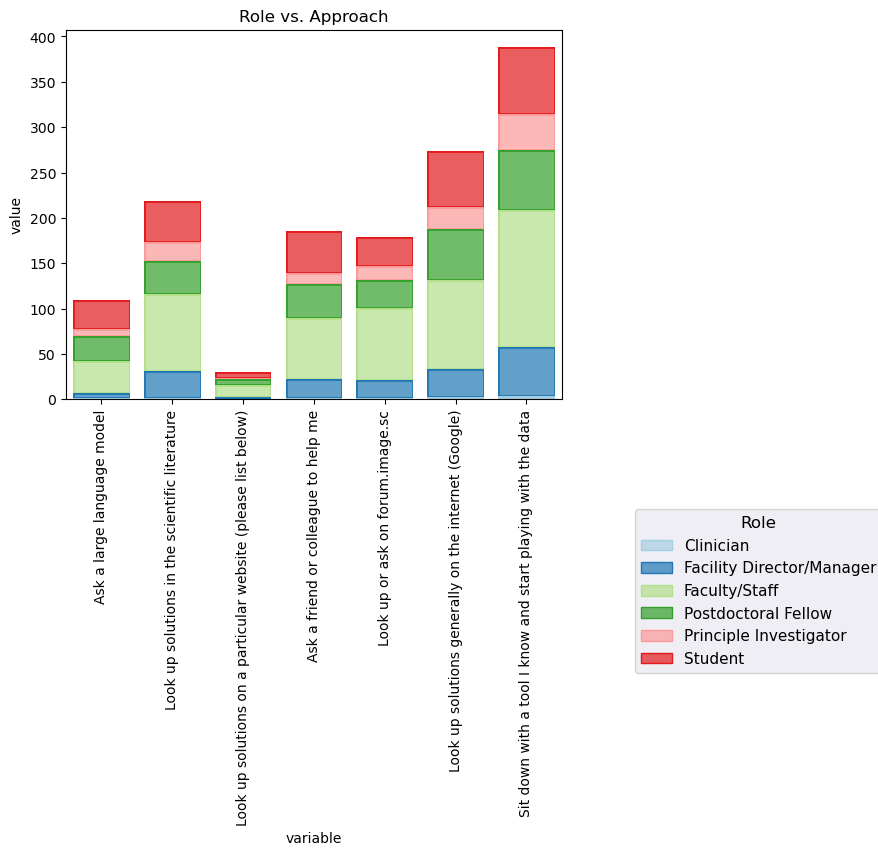

In [45]:
utils.plot_single_vs_multi(df_grouped_LS,
                           legend_title = 'Role',
                           plottitle = 'Role vs. Approach',
                           plot_filename=os.path.join('figures','Role_vs_Approach_byRole_LS.png'),
                           groupbyfirstcol=False
                           )

/Users/eweisbar/miniforge3/envs/run_stuff/lib/python3.9/site-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (12) than needed (5), which may not be intended.
  warnings.warn(message, UserWarning)


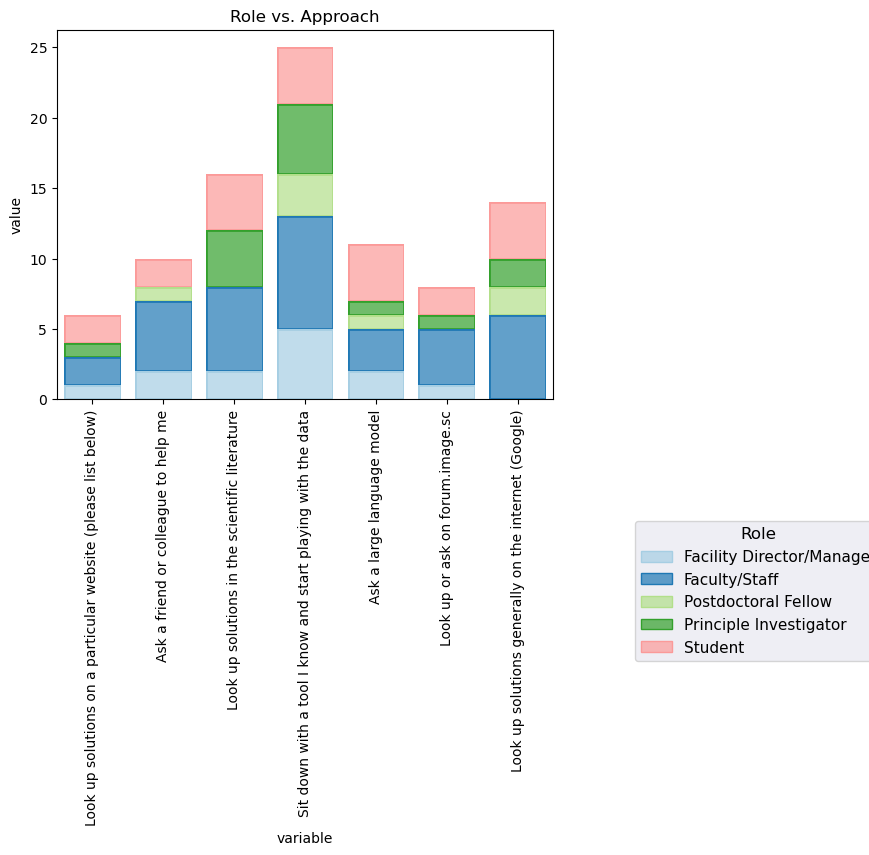

In [46]:
utils.plot_single_vs_multi(df_grouped_PS,
                           legend_title = 'Role',
                           plottitle = 'Role vs. Approach',
                           plot_filename=os.path.join('figures','Role_vs_Approach_byRole_PS.png'),
                           groupbyfirstcol=False
                           )

/Users/eweisbar/miniforge3/envs/run_stuff/lib/python3.9/site-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (12) than needed (3), which may not be intended.
  warnings.warn(message, UserWarning)


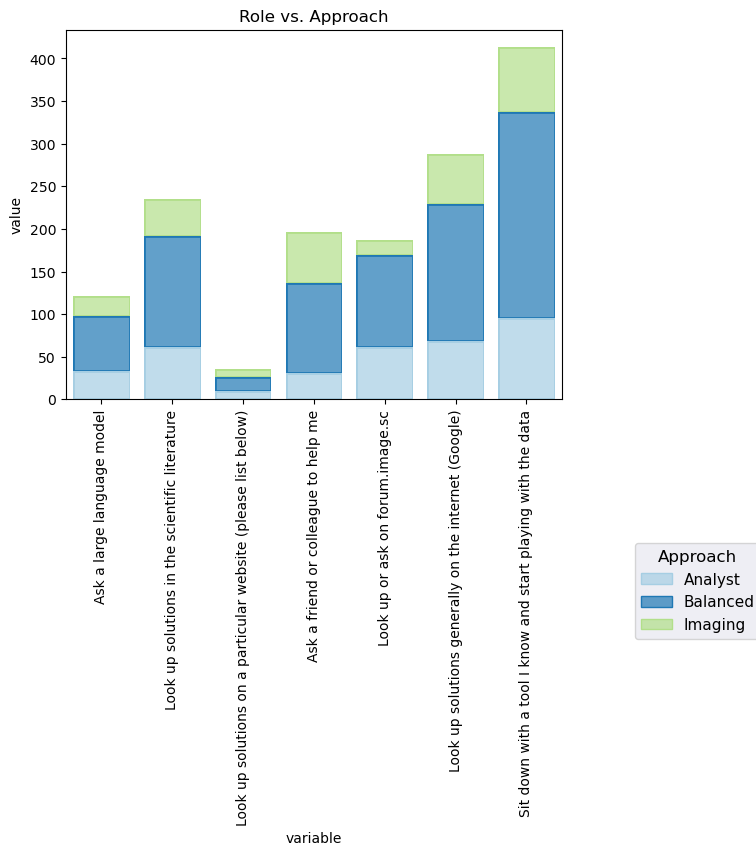

In [47]:
df_grouped = utils.make_counts_per_multiselect_group(data,
                                         single_select_col= 'Work',
                                         multi_select_col= 'How do you generally go about solving an image analysis problem? Check the approach(es) you use the most.')
df_grouped = df_grouped[['Work']+[x for x in df_grouped.columns if x in prov_resps]]
utils.plot_single_vs_multi(df_grouped,
                           legend_title = 'Approach',
                           plottitle = 'Role vs. Approach',
                           plot_filename=os.path.join('figures','Role_vs_Approach_Work.png'),
                           groupbyfirstcol=False
                           )

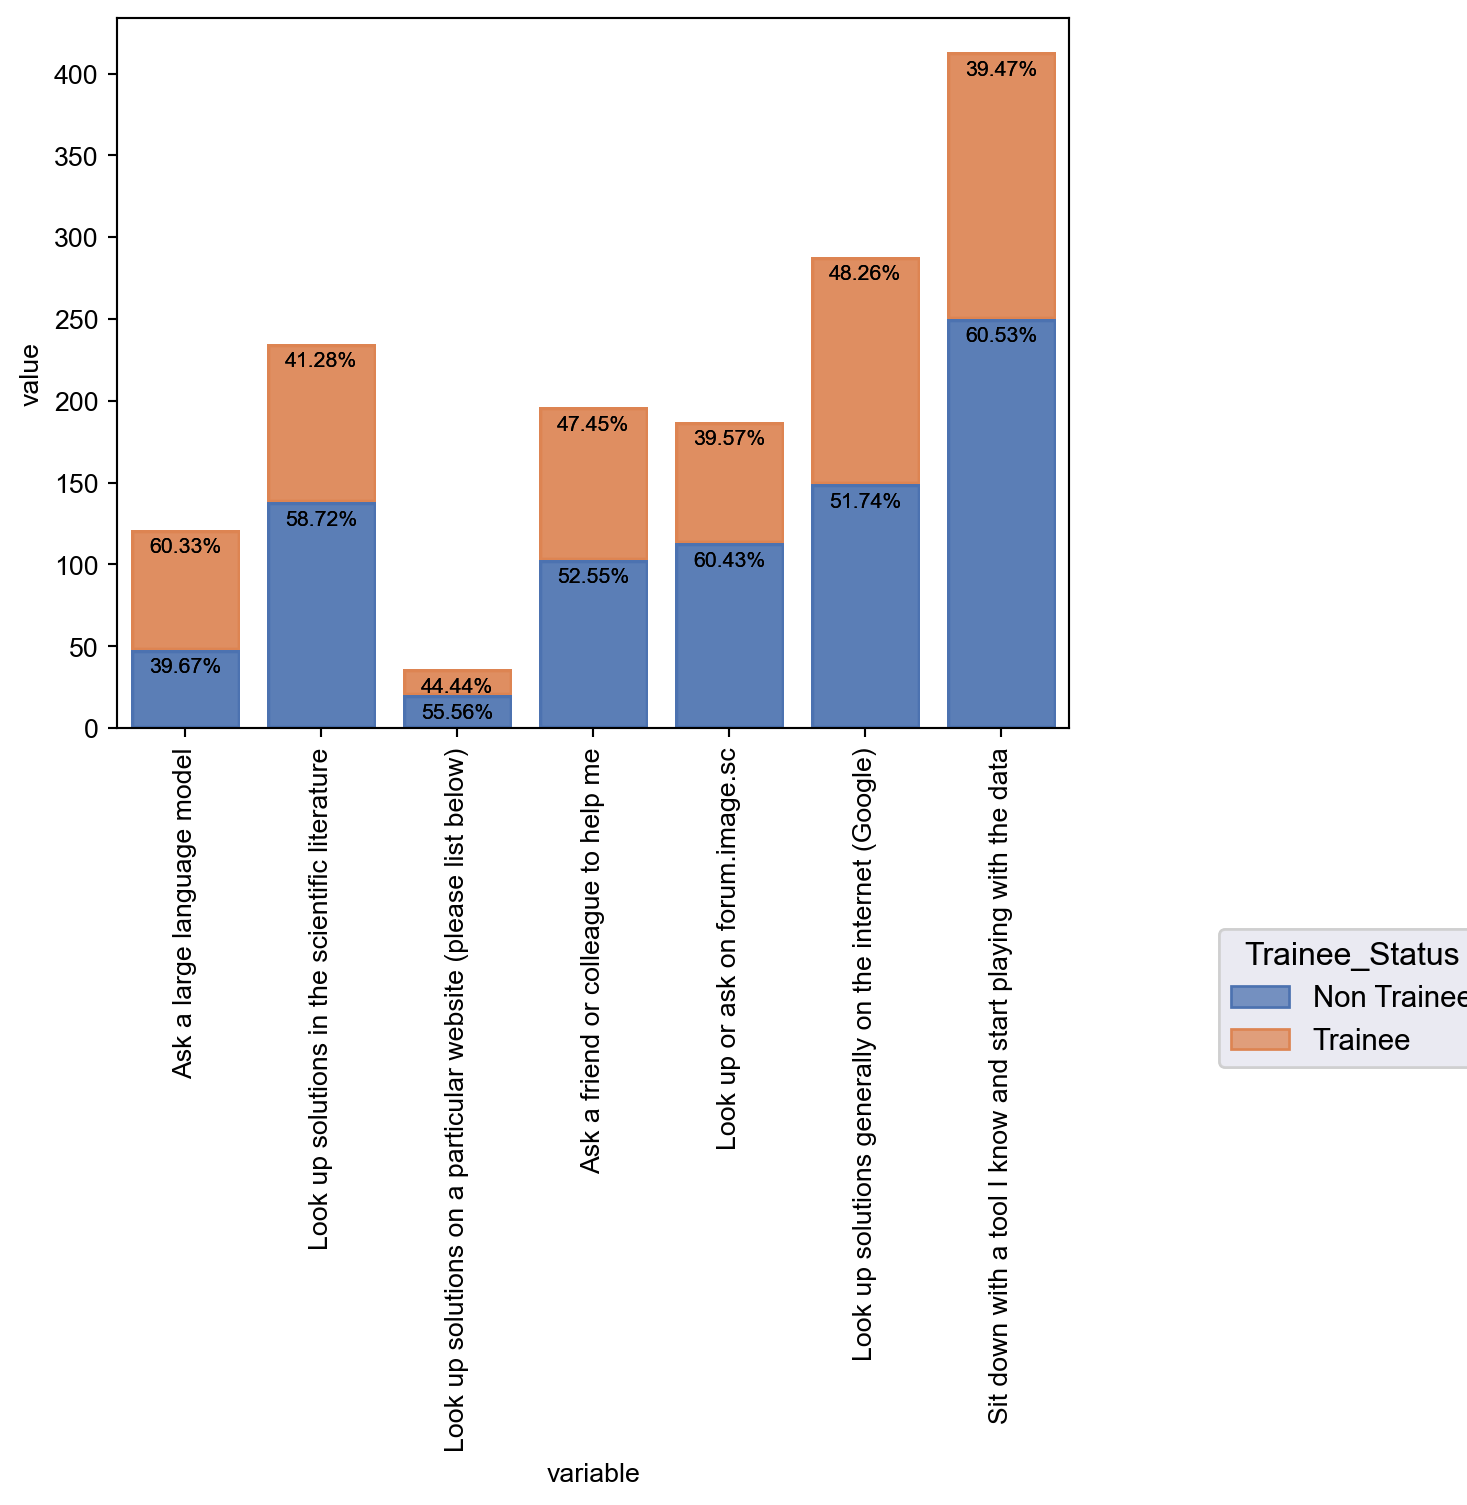

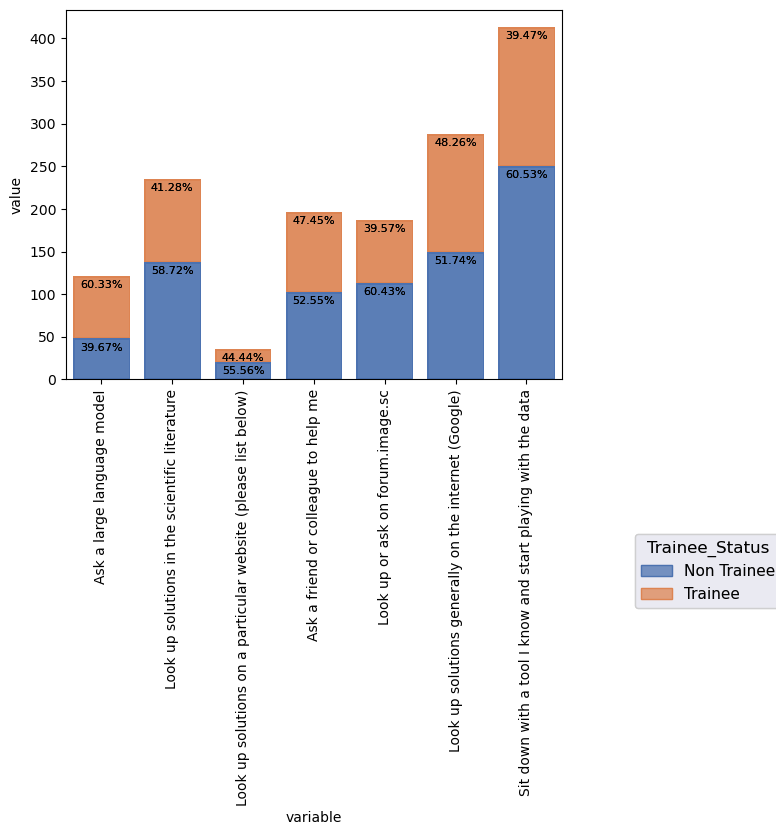

In [48]:
df_grouped = utils.make_counts_per_multiselect_group(data,
                                         single_select_col= 'Trainee_Status',
                                         multi_select_col= 'How do you generally go about solving an image analysis problem? Check the approach(es) you use the most.')
df_grouped = df_grouped[['Trainee_Status']+[x for x in df_grouped.columns if x in prov_resps]]

melt = df_grouped.melt(id_vars=['Trainee_Status'])
melt['total_per_col'] = 'TBD'
for var in melt['variable'].unique():
    melt.loc[melt['variable']==var,'total_per_col'] = melt.loc[melt['variable']==var]['value'].sum()
melt['frac_per_col'] = melt['value']/melt['total_per_col']
melt['frac_per_col'] = melt['frac_per_col'].apply(lambda x: f"{x:.2%}")

fig, ax = plt.subplots()
ax.xaxis.set_tick_params(rotation=90)
p = (so.Plot(melt,x=melt.columns[1],y='value', color=melt.columns[0])
.add(so.Bar(), so.Agg(),so.Stack())
.add(so.Text(valign='bottom', fontsize=8, color='black', offset=-10), so.Agg(), so.Stack(), text='frac_per_col' )
.on(ax)
)
p.save(loc="figures/Approach_Fraction_Trainee.png", bbox_inches="tight")

## Have you ever used forum.image.sc?

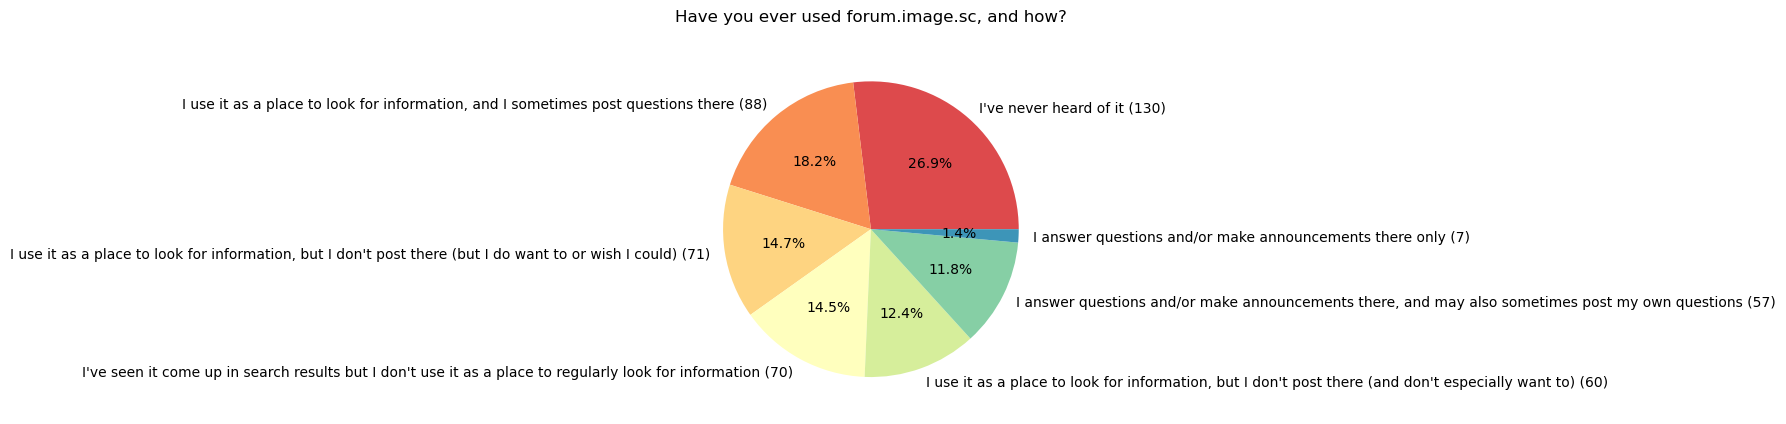

In [49]:
col = 'Have you ever used forum.image.sc, and how?'
utils.single_select(data, col, os.path.join('figures','Forum_Usage_pie.png'), type='pie')

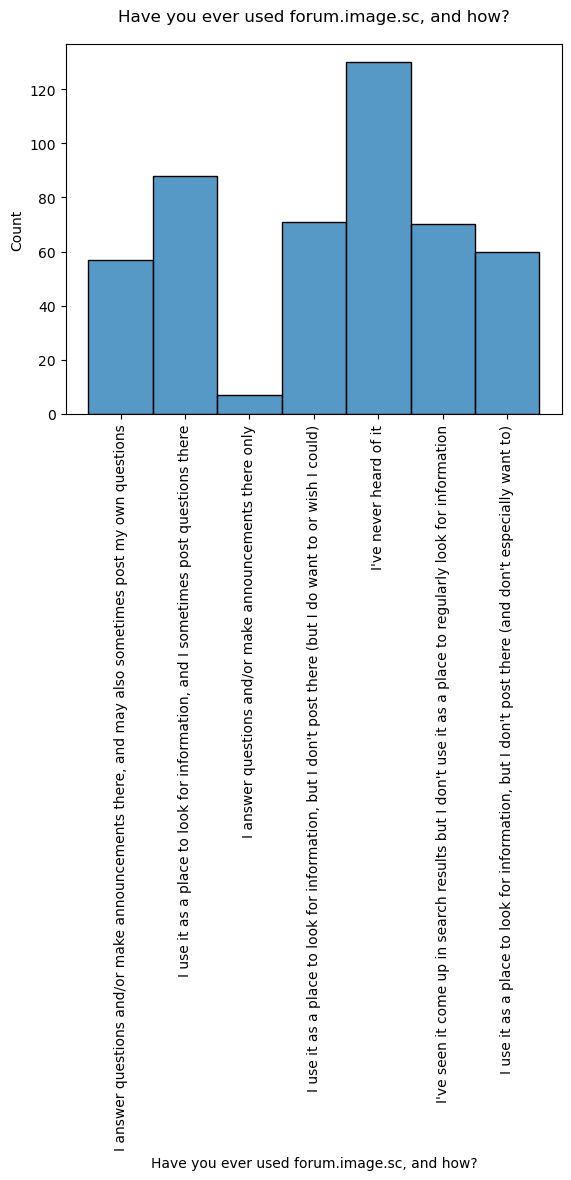

In [50]:
utils.single_select(data, col, os.path.join('figures','Forum_Usage_histogram.png'), type='histogram',rotate_x=True)

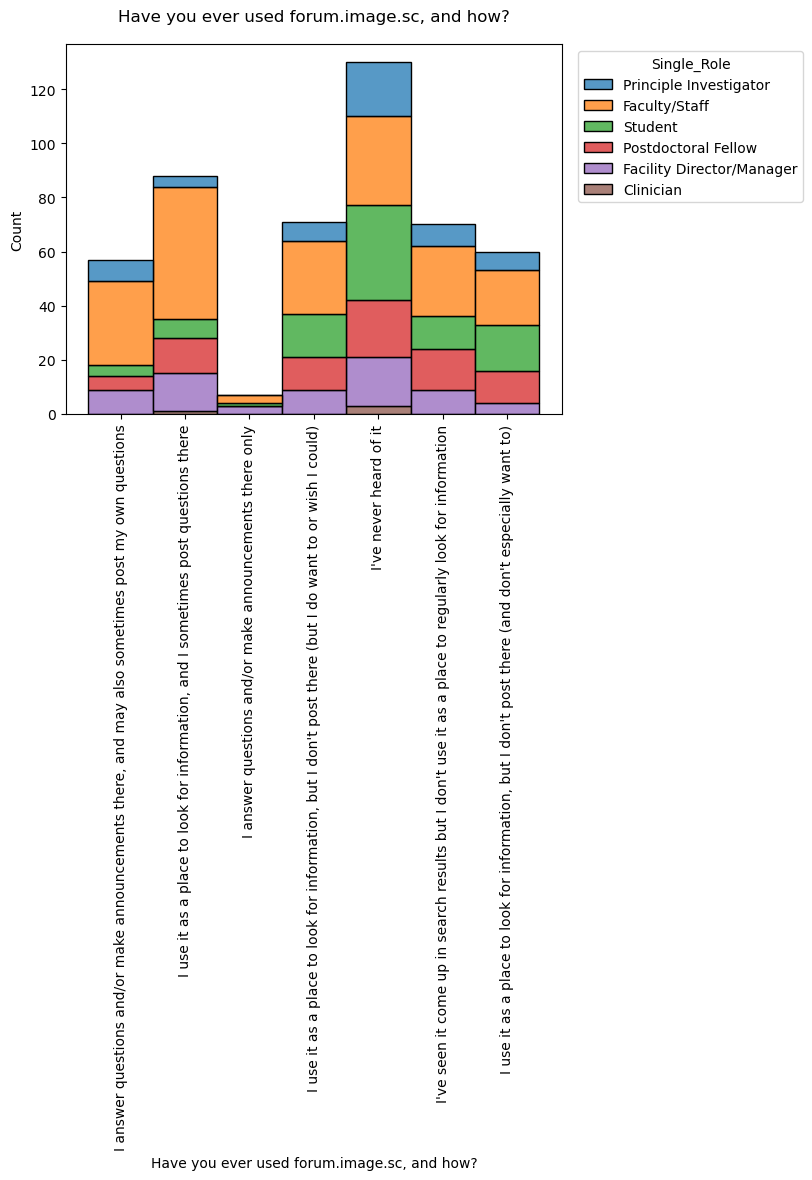

In [51]:
utils.single_select(data, col, os.path.join('figures','Forum_Usage_histogram_by_Role.png'), type='histogram', hue='Single_Role',rotate_x=True,
                multiple="stack")

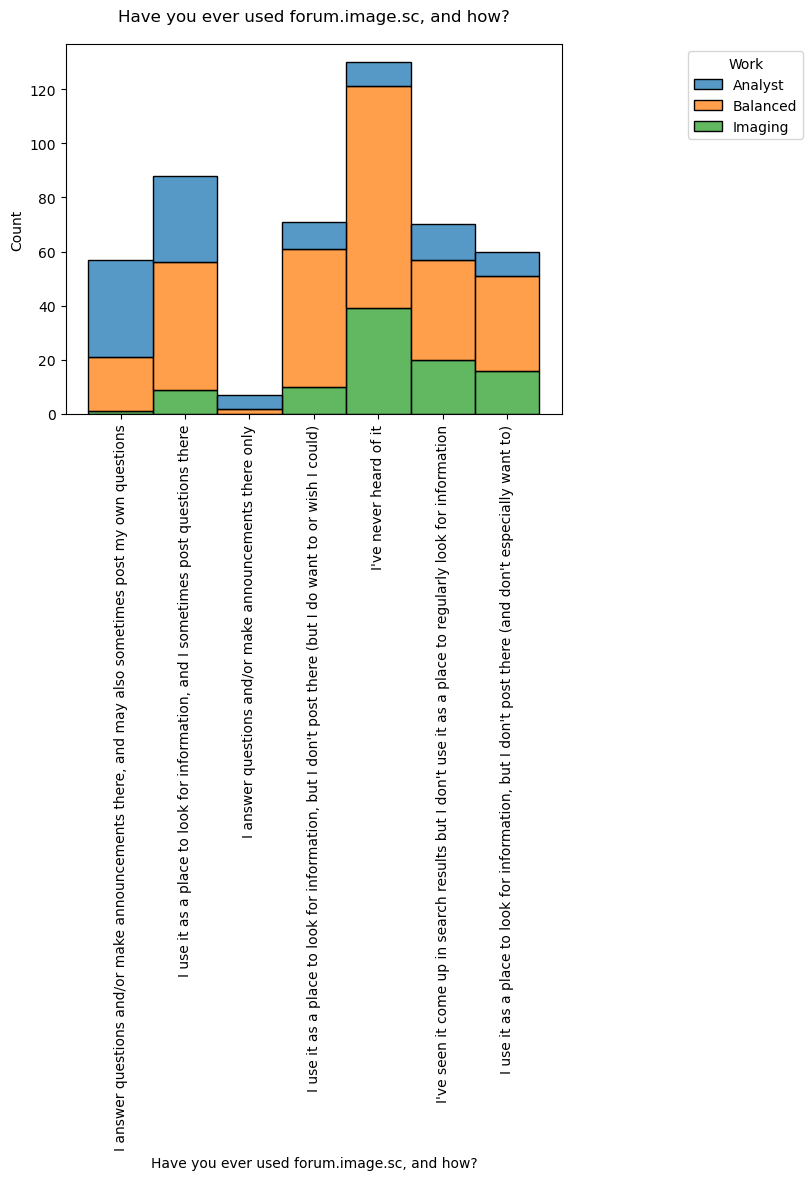

In [52]:
utils.single_select(data, col, os.path.join('figures','Forum_Usage_histogram_by_WorkType.png'), type='histogram', hue='Work',rotate_x=True,
                multiple="stack")

## How frequently do you use scripting to solve image analysis problems?

In [53]:
col = 'How frequently do you use scripting to solve image analysis problems?'
data[col] = data[col].astype('category')

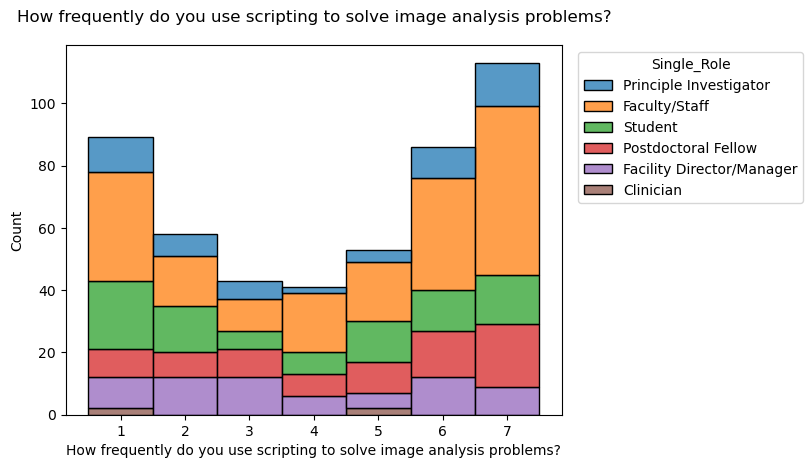

In [54]:
utils.single_select(data, plot_filename='figures/Scripting_Usage_byRole.png',
                    type='histogram',
                column=col,
hue='Single_Role',multiple="stack")

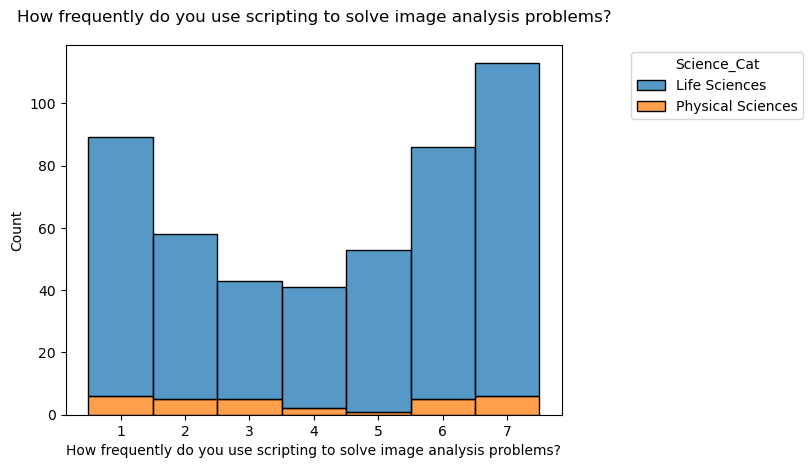

In [55]:
utils.single_select(data, plot_filename='figures/Scripting_Usage_byLSPS.png',
                    type='histogram',
                column=col,
hue="Science_Cat",
multiple="stack")

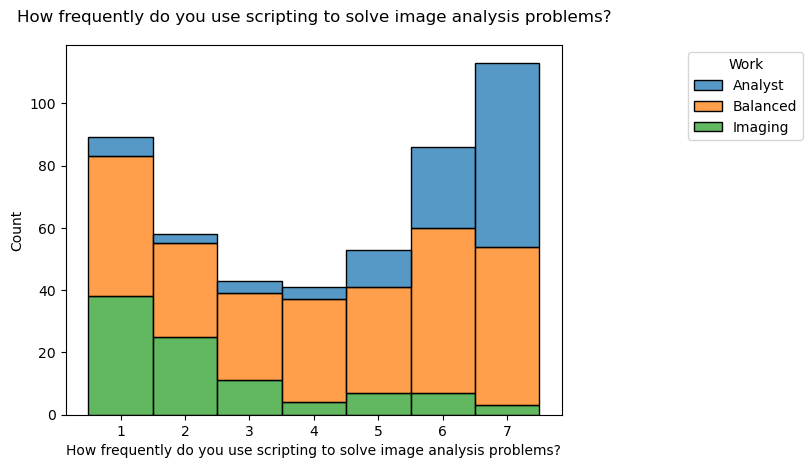

In [56]:
utils.single_select(data, plot_filename='figures/Scripting_Usage_byWorkType.png',
                    type='histogram',
                column=col,
hue='Work',
multiple="stack")

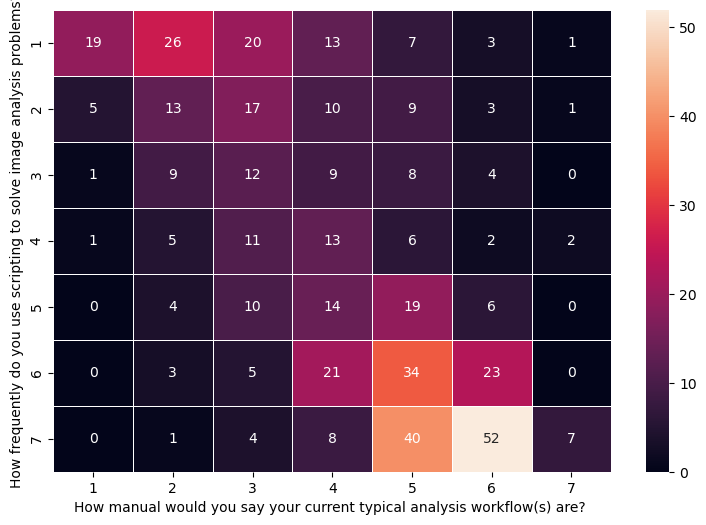

In [57]:
col1 = 'How frequently do you use scripting to solve image analysis problems?'
col2 = 'How manual would you say your current typical analysis workflow(s) are? '
df = data[[col1, col2]].dropna()
df = df.astype('int').astype('category')
df = df.value_counts().to_frame().reset_index().pivot(index=col1, columns=col2, values="count").fillna(0)
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df, annot=True, linewidths=.5, ax=ax)
plt.savefig('figures/Scripting_Usage_vs_Manual_Workflow.png')

## How frequently do you use machine learning to solve image analysis problems?

In [58]:
col = 'How frequently do you use machine learning (including but not limited to deep learning or Large Language Models) to solve image analysis problems?'
data[col] = data[col].astype('category')

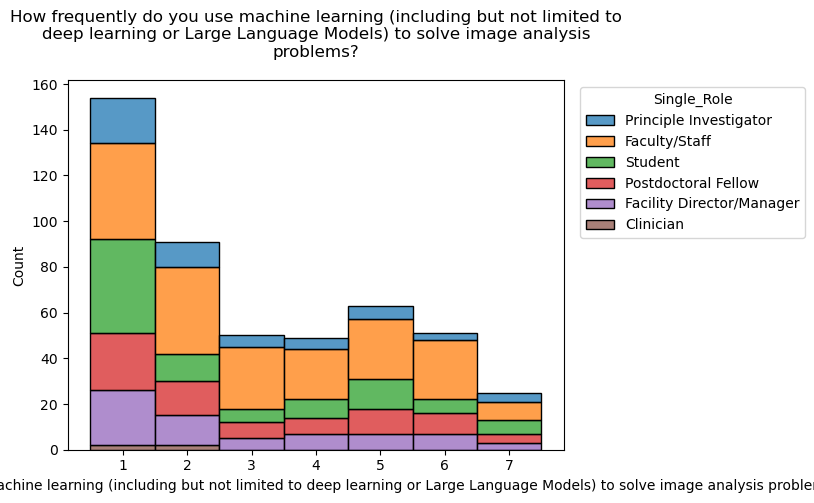

In [59]:
utils.single_select(data, plot_filename='figures/ML_Usage_byRole.png',
                    type='histogram',
                column=col,
hue='Single_Role',multiple="stack")

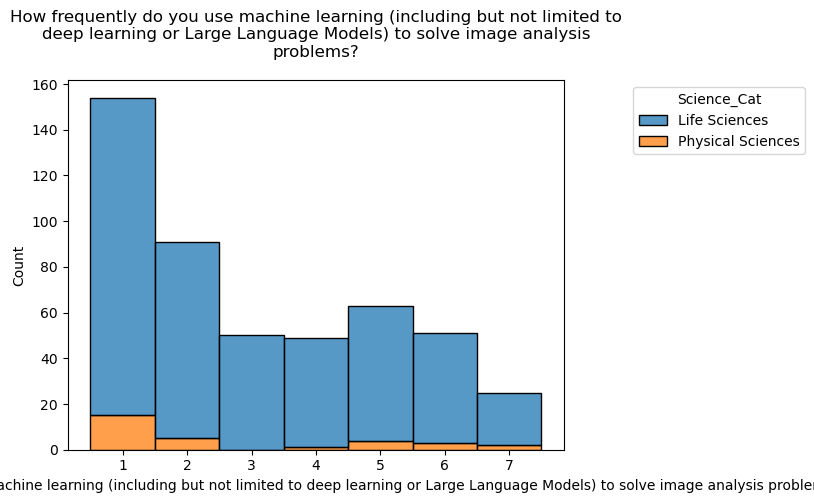

In [60]:
utils.single_select(data, plot_filename='figures/ML_Usage_byLSPS.png',
                    type='histogram',
                column=col,
hue="Science_Cat",
multiple="stack")

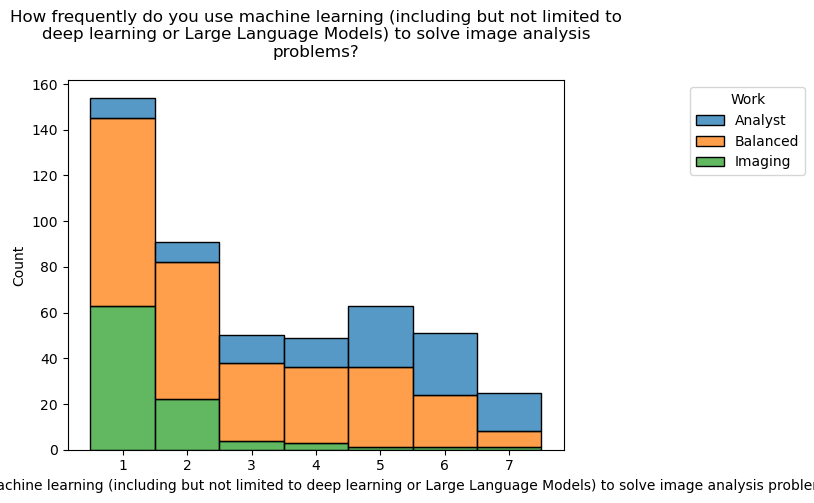

In [61]:
utils.single_select(data, plot_filename='figures/ML_Usage_byWorkType.png',
                    type='histogram',
                column=col,
hue='Work',
multiple="stack")

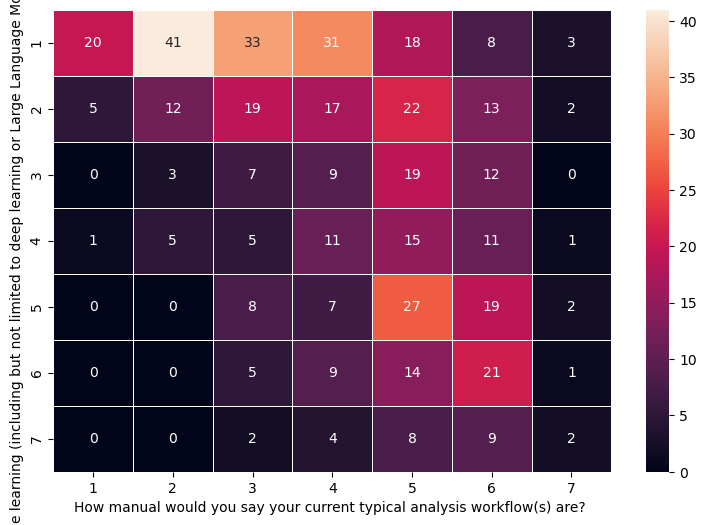

In [62]:
col1 = 'How frequently do you use machine learning (including but not limited to deep learning or Large Language Models) to solve image analysis problems?'
col2 = 'How manual would you say your current typical analysis workflow(s) are? '
df = data[[col1, col2]].dropna()
df = df.astype('int').astype('category')
df = df.value_counts().to_frame().reset_index().pivot(index=col1, columns=col2, values="count").fillna(0)
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df, annot=True, linewidths=.5, ax=ax)
plt.savefig('figures/ML_vs_Manual_Workflow.png')

## How preferable do you find each of these instructional topics?

In [63]:
df = data[[x for x in data.columns if 'In regards' in x]]
# make the columns look nicer
df.columns = [x.replace('In regards to learning more about image analysis, how preferable do you find each of these instructional methods? ','') for x in df.columns]
df.columns = [x.replace('[','').replace(']','') for x in df.columns]

methods_2024 = utils.df_for_percentage_stackedcharts(df)
methods_2024

,index,Moderately preferable,Somewhat preferable,Very preferable,Not at all preferable
0,"Scholarly ""best practices"" article",35.2,30.2,24.6,9.9
1,Written step-by-step tutorial,32.3,9.7,57.3,0.6
2,Video tutorial,32.7,16.4,43.9,7.0
3,Interactive webinar,36.0,29.6,21.1,13.3
4,"One-on-one ""office hours"" with an expert",26.5,26.3,39.1,8.1
5,In person seminar/tutorial lasting <1 day,30.6,25.7,32.9,10.8
6,Multiday workshop,28.0,32.1,28.2,11.8
7,Human+machine dialogues with an LLM,19.5,38.1,8.5,34.0


/Users/eweisbar/miniforge3/envs/run_stuff/lib/python3.9/site-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (12) than needed (4), which may not be intended.
  warnings.warn(message, UserWarning)


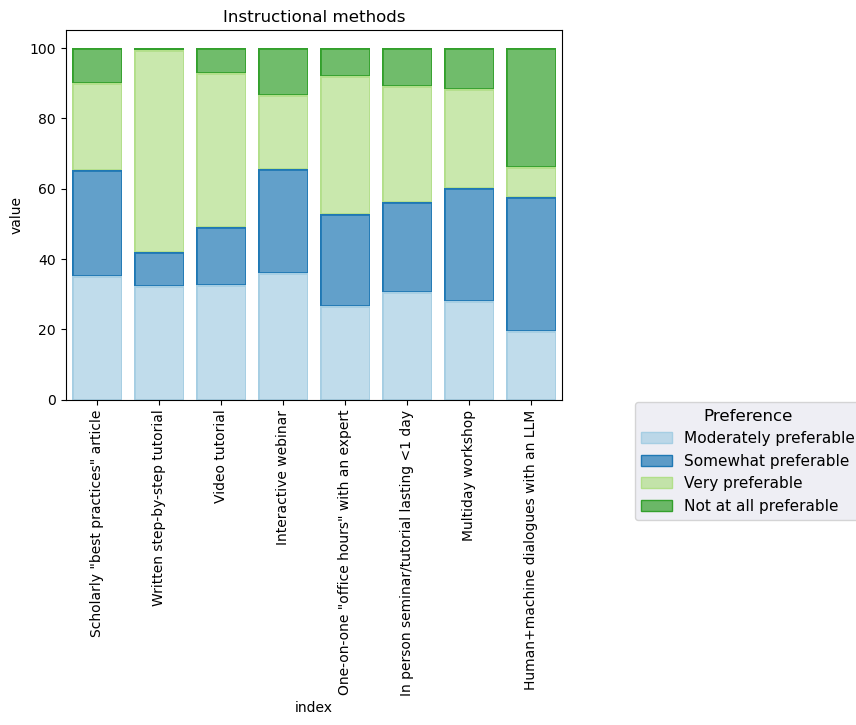

In [64]:
utils.plot_single_vs_multi(methods_2024,
                        'Preference',
                        'figures/Instructional_Methods.png',
                        "Instructional methods",
                        groupbyfirstcol=True)

## How interested are you in learning more about the following topics?

In [65]:
df = data[[x for x in data.columns if 'How interested are you' in x]]
# make the columns look nicer
df.columns = [x.replace('How interested are you in learning more about the following topics? ','') for x in df.columns]
df.columns = [x.replace('[','').replace(']','') for x in df.columns]

topics_2024 = utils.df_for_percentage_stackedcharts(df)
topics_2024

,index,Very interested,Moderately interested,Somewhat interested,Not at all interested
0,Image analysis theory,38.3,31.1,26.1,4.6
1,General image analysis best practices,56.5,31.7,10.1,1.7
2,Image analysis practices related to my (sub) d...,67.9,23.4,7.9,0.8
3,Learning to use a particular software tool,40.0,38.1,20.3,1.7
4,Deep learning as applied to image analysis,44.3,32.1,18.6,5.0
5,Analyzing large images/large numbers of images,56.1,25.7,15.3,2.9
6,Visualizing image analysis results,55.1,30.6,12.0,2.3
7,Image analysis training and education (pedagogy),34.6,27.3,24.8,13.3


/Users/eweisbar/miniforge3/envs/run_stuff/lib/python3.9/site-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (12) than needed (4), which may not be intended.
  warnings.warn(message, UserWarning)


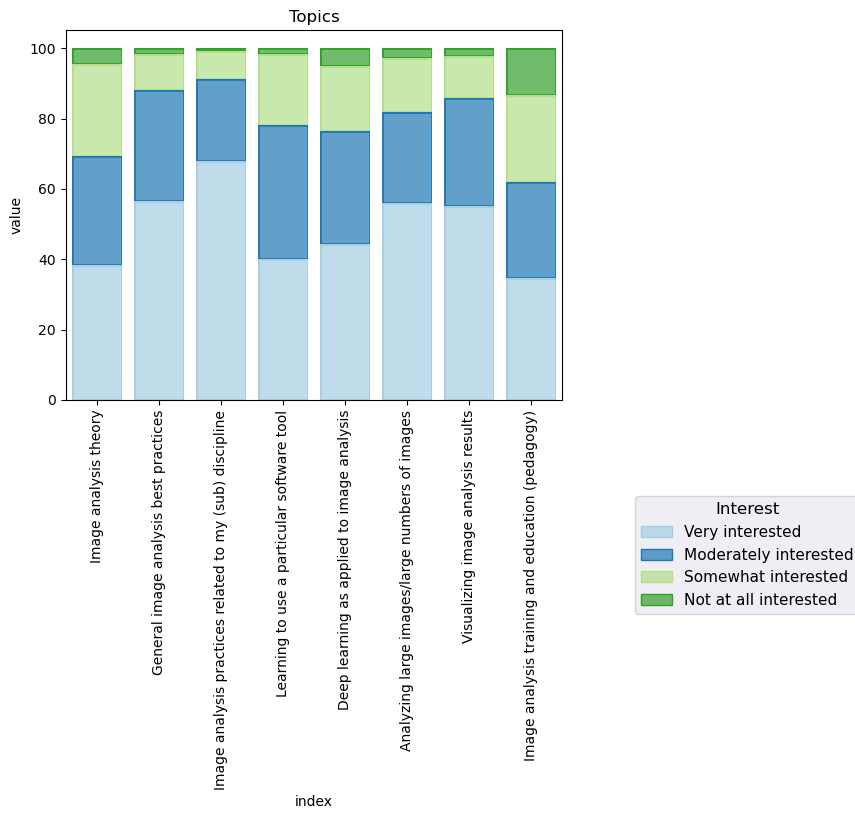

In [66]:
utils.plot_single_vs_multi(topics_2024,
                        'Interest',
                        'figures/Topics.png',
                        "Topics",
                        groupbyfirstcol=True)

## Compare between years

In [67]:
# bring in data from previous years
topics_2022 = pd.read_csv('/Users/eweisbar/Desktop/github/2023_ImageAnalysisSurvey/csv files/topics_interest_df.csv', index_col=0)
methods_2022 = pd.read_csv('/Users/eweisbar/Desktop/github/2023_ImageAnalysisSurvey/csv files/preferred_mtds_df.csv', index_col=0)

# Topics of interest for the tutorials - 2020 
int_2020_theory_url = ('https://raw.githubusercontent.com/ciminilab/2021_Jamali_BiologicalImaging/main/AnonymizedSurveyQuestions/How_interested_are_you_in_learning_more_about_the_following_topics_Image_analysis_theory_.csv')
int_2020_theory = pd.read_csv(int_2020_theory_url)
int_2020_theory = int_2020_theory.rename(columns={'0':'Image analysis theory'})

int_2020_practices_url = ('https://raw.githubusercontent.com/ciminilab/2021_Jamali_BiologicalImaging/main/AnonymizedSurveyQuestions/How_interested_are_you_in_learning_more_about_the_following_topics_General_image_analysis_practices.csv')
int_2020_practices = pd.read_csv(int_2020_practices_url)
int_2020_practices = int_2020_practices.rename(columns={'0':'Image analysis practices'})

int_2020_par_field_url = ('https://raw.githubusercontent.com/ciminilab/2021_Jamali_BiologicalImaging/main/AnonymizedSurveyQuestions/How_interested_are_you_in_learning_more_about_the_following_topics_Image_analysis_practices_particular_to_my_field.csv')
int_2020_par_field = pd.read_csv(int_2020_par_field_url)
int_2020_par_field = int_2020_par_field.rename(columns={'0':'Topics related to sub discipline'})

int_2020_spc_tool_url = ('https://raw.githubusercontent.com/ciminilab/2021_Jamali_BiologicalImaging/main/AnonymizedSurveyQuestions/How_interested_are_you_in_learning_more_about_the_following_topics_Learning_to_use_a_particular_software_tool.csv')
int_2020_spc_tool = pd.read_csv(int_2020_spc_tool_url)
int_2020_spc_tool = int_2020_spc_tool.rename(columns={'0':'Specific software tool'})

int_2020_DL_url = ('https://raw.githubusercontent.com/ciminilab/2021_Jamali_BiologicalImaging/main/AnonymizedSurveyQuestions/How_interested_are_you_in_learning_more_about_the_following_topics_Deep_learning_as_applied_to_image_analysis.csv')
int_2020_DL = pd.read_csv(int_2020_DL_url)
int_2020_DL = int_2020_DL.rename(columns={'0':'Deep learning for image analysis'})

data_int = pd.concat([int_2020_theory,int_2020_practices,int_2020_par_field,int_2020_spc_tool,int_2020_DL], axis=1)
topics_2020 = utils.df_for_percentage_stackedcharts(data_int)

# Preferable instructional topics - 2020 
art_20_url = ('https://raw.githubusercontent.com/ciminilab/2021_Jamali_BiologicalImaging/main/AnonymizedSurveyQuestions/For_any_topics_you_re_interested_in_how_interested_would_you_be_in_learning_about_them_in_the_following_ways_Scholarly_best_practices_article.csv')
art_20 = pd.read_csv(art_20_url)
art_20 = art_20.rename(columns={'0':'Best practices articles'})

wrt_tut_20_url = ('https://raw.githubusercontent.com/ciminilab/2021_Jamali_BiologicalImaging/main/AnonymizedSurveyQuestions/For_any_topics_you_re_interested_in_how_interested_would_you_be_in_learning_about_them_in_the_following_ways_Written_step-by-step_tutorial.csv')
wrt_tut_20 = pd.read_csv(wrt_tut_20_url)
wrt_tut_20 = wrt_tut_20.rename(columns={'0':'Written tutorials'})

vid_tut_20_url = ('https://raw.githubusercontent.com/ciminilab/2021_Jamali_BiologicalImaging/main/AnonymizedSurveyQuestions/For_any_topics_you_re_interested_in_how_interested_would_you_be_in_learning_about_them_in_the_following_ways_Video_tutorial.csv')
vid_tut_20 = pd.read_csv(vid_tut_20_url)
vid_tut_20 = vid_tut_20.rename(columns={'0':'Video tutorial'})

int_web_20_url = ('https://raw.githubusercontent.com/ciminilab/2021_Jamali_BiologicalImaging/main/AnonymizedSurveyQuestions/For_any_topics_you_re_interested_in_how_interested_would_you_be_in_learning_about_them_in_the_following_ways_Interactive_webinar.csv')
int_web_20 = pd.read_csv(int_web_20_url)
int_web_20 = int_web_20.rename(columns={'0':'Interactive webinar'})

off_hr_20_url = ('https://raw.githubusercontent.com/ciminilab/2021_Jamali_BiologicalImaging/main/AnonymizedSurveyQuestions/For_any_topics_you_re_interested_in_how_interested_would_you_be_in_learning_about_them_in_the_following_ways_One-on-one_office_hours_with_an_expert.csv')
off_hr_20 = pd.read_csv(off_hr_20_url)
off_hr_20 = off_hr_20.rename(columns={'0':'Office hours'})

one_day_20_url = ('https://raw.githubusercontent.com/ciminilab/2021_Jamali_BiologicalImaging/main/AnonymizedSurveyQuestions/For_any_topics_you_re_interested_in_how_interested_would_you_be_in_learning_about_them_in_the_following_ways_In_person_seminar_tutorial_lasting_lessthan1_day.csv')
one_day_20 = pd.read_csv(one_day_20_url)
one_day_20 = one_day_20.rename(columns={'0':'One day seminar'})

mul_day_20_url = ('https://raw.githubusercontent.com/ciminilab/2021_Jamali_BiologicalImaging/main/AnonymizedSurveyQuestions/For_any_topics_you_re_interested_in_how_interested_would_you_be_in_learning_about_them_in_the_following_ways_Multiday_workshop.csv')
mul_day_20 = pd.read_csv(mul_day_20_url)
mul_day_20 = mul_day_20.rename(columns={'0':'Multiday workshop'})

data_int = pd.concat([art_20, wrt_tut_20, vid_tut_20, int_web_20, off_hr_20, one_day_20, mul_day_20], axis=1)
methods_2020 = utils.df_for_percentage_stackedcharts(data_int)


In [68]:
# Make naming match between years
methods_2024['index'] = methods_2024['index'].str.replace('Scholarly "best practices" article', 'Best practices articles')
methods_2024['index'] = methods_2024['index'].str.replace('Written step-by-step tutorial', 'Written tutorials')
methods_2024['index'] = methods_2024['index'].str.replace('One-on-one "office hours" with an expert', 'Office hours')
methods_2024['index'] = methods_2024['index'].str.replace('In person seminar/tutorial lasting <1 day', 'One day seminar')
methods_2024['index'] = methods_2024['index'].str.replace('Human+machine dialogues with an LLM', 'LLM')

methods_2020.columns = [x.replace('interested', 'preferable') for x in methods_2020.columns]
methods_2020.columns = [x.replace('A little', 'Somewhat') for x in methods_2020.columns]

methods_2020 = methods_2020.melt(id_vars=['index'])
methods_2020['Year'] = '2020'
methods_2022 = methods_2022.reset_index().melt(id_vars=['index'])
methods_2022['Year'] = '2022'
methods_2024 = methods_2024.melt(id_vars=['index'])
methods_2024['Year'] = '2024'

methods_comp = pd.concat([methods_2020, methods_2022, methods_2024], axis=0)
methods_comp

,index,variable,value,Year
0,Best practices articles,Moderately preferable,43.4,2020
1,Written tutorials,Moderately preferable,28.5,2020
2,Video tutorial,Moderately preferable,23.1,2020
3,Interactive webinar,Moderately preferable,31.0,2020
4,Office hours,Moderately preferable,27.5,2020
...,...,...,...,...
27,Interactive webinar,Not at all preferable,13.3,2024
28,Office hours,Not at all preferable,8.1,2024
29,One day seminar,Not at all preferable,10.8,2024
30,Multiday workshop,Not at all preferable,11.8,2024


In [69]:
# Make naming match between years
topics_2024['index'] = topics_2024['index'].str.replace('General image analysis best practices', 'Image analysis practices')
topics_2024['index'] = topics_2024['index'].str.replace('Image analysis practices related to my (sub) discipline', 'Topics related to sub discipline')
topics_2024['index'] = topics_2024['index'].str.replace('Learning to use a particular software tool', 'Specific software tool')
topics_2024['index'] = topics_2024['index'].str.replace('Deep learning as applied to image analysis', 'Deep learning for image analysis')
topics_2024['index'] = topics_2024['index'].str.replace('Analyzing large images/large numbers of images', 'Analyzing large images')
topics_2024['index'] = topics_2024['index'].str.replace('Visualizing image analysis results', 'Visualization of results')
topics_2024['index'] = topics_2024['index'].str.replace('Image analysis training and education (pedagogy)', 'Pedagogy')

topics_2020.columns = [x.replace('A little', 'Somewhat') for x in topics_2020.columns]

topics_2020 = topics_2020.melt(id_vars=['index'])
topics_2020['Year'] = '2020'
topics_2022 = topics_2022.reset_index().melt(id_vars=['index'])
topics_2022['Year'] = '2022'
topics_2024 = topics_2024.melt(id_vars=['index'])
topics_2024['Year'] = '2024'

topics_comp = pd.concat([topics_2020, topics_2022, topics_2024], axis=0)
topics_comp

,index,variable,value,Year
0,Image analysis theory,Very interested,37.6,2020
1,Image analysis practices,Very interested,51.2,2020
2,Topics related to sub discipline,Very interested,74.4,2020
3,Specific software tool,Very interested,49.2,2020
4,Deep learning for image analysis,Very interested,48.3,2020
...,...,...,...,...
27,Specific software tool,Not at all interested,1.7,2024
28,Deep learning for image analysis,Not at all interested,5.0,2024
29,Analyzing large images,Not at all interested,2.9,2024
30,Visualization of results,Not at all interested,2.3,2024


/Users/eweisbar/miniforge3/envs/run_stuff/lib/python3.9/site-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (12) than needed (4), which may not be intended.
  warnings.warn(message, UserWarning)


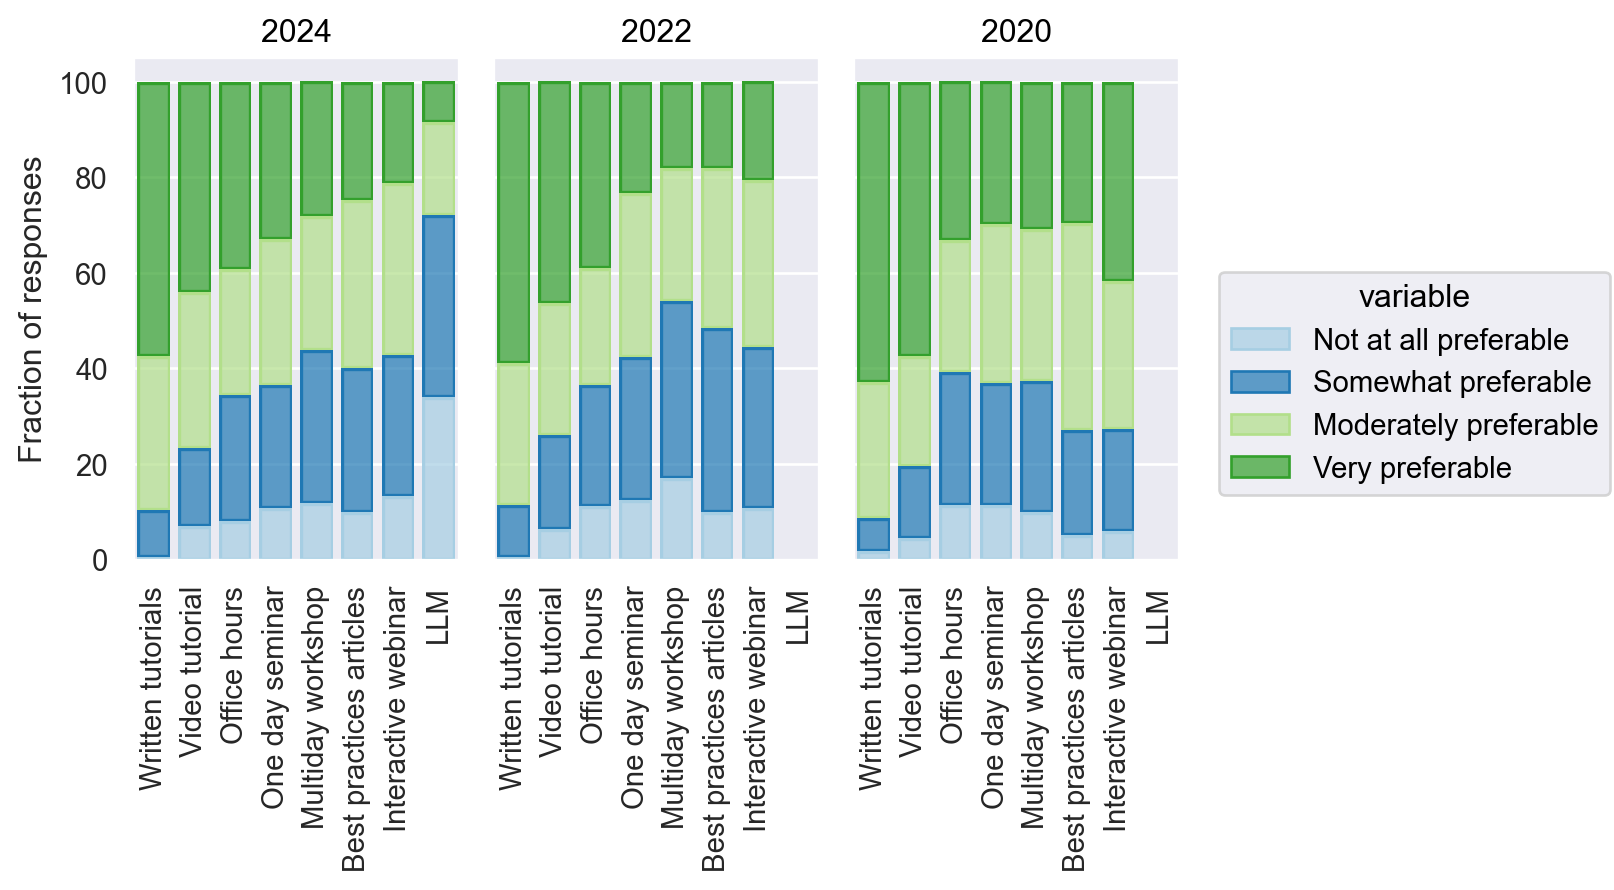

In [70]:
# sort columns by preference of 2024
df = methods_comp.loc[methods_comp['Year']=='2024'] 
df = df.loc[df['variable']=='Very preferable'].sort_values('value', ascending=False)
col_order = df['index'].to_list()

methods_comp['variable'] = pd.Categorical(methods_comp['variable'],categories=['Not at all preferable', 'Somewhat preferable', 'Moderately preferable','Very preferable'])
methods_comp['index'] = pd.Categorical(methods_comp['index'],categories=col_order)
methods_comp=methods_comp.sort_values('variable')

p = (so.Plot(methods_comp,x='index',y='value', color='variable')
.facet(col='Year', order=['2024', '2022', '2020'])
.add(so.Bar(),so.Stack())
.label(title="{}".format,x="", y="Fraction of responses",)
.scale(color=sns.color_palette("Paired"))
.plot()
)
for axis in p._figure.axes:
    axis.xaxis.set_tick_params(rotation=90)

p.save(loc='figures/Instructional_Methods_across_years.png', bbox_inches="tight")

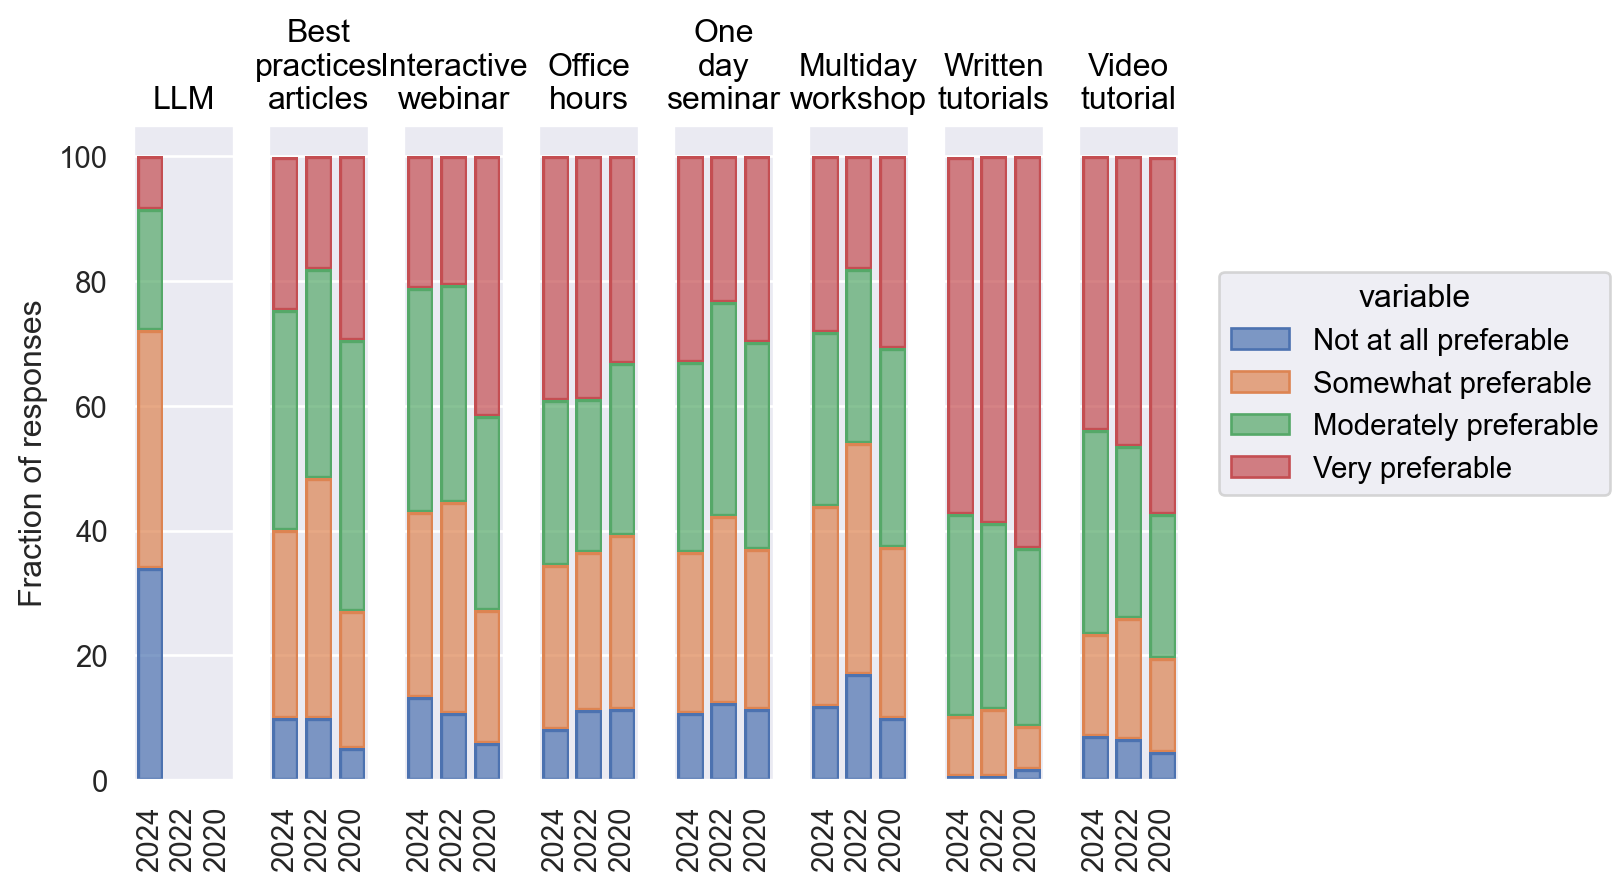

In [71]:
methods_comp['cat_label'] = methods_comp['index'].str.replace(' ','\n')
methods_comp

p = (so.Plot(methods_comp, x='Year', y='value', color='variable')
     .facet(col='cat_label')
     .add(so.Bar(), so.Stack())
     #.scale(x=so.Nominal())
     .label(x="", y="Fraction of responses", title="{}".format)
).plot()
for axis in p._figure.axes:
    axis.xaxis.set_tick_params(rotation=90)

p.save(loc='figures/Instructional_Methods_across_years_byMethod.png', bbox_inches="tight")

/Users/eweisbar/miniforge3/envs/run_stuff/lib/python3.9/site-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (12) than needed (4), which may not be intended.
  warnings.warn(message, UserWarning)


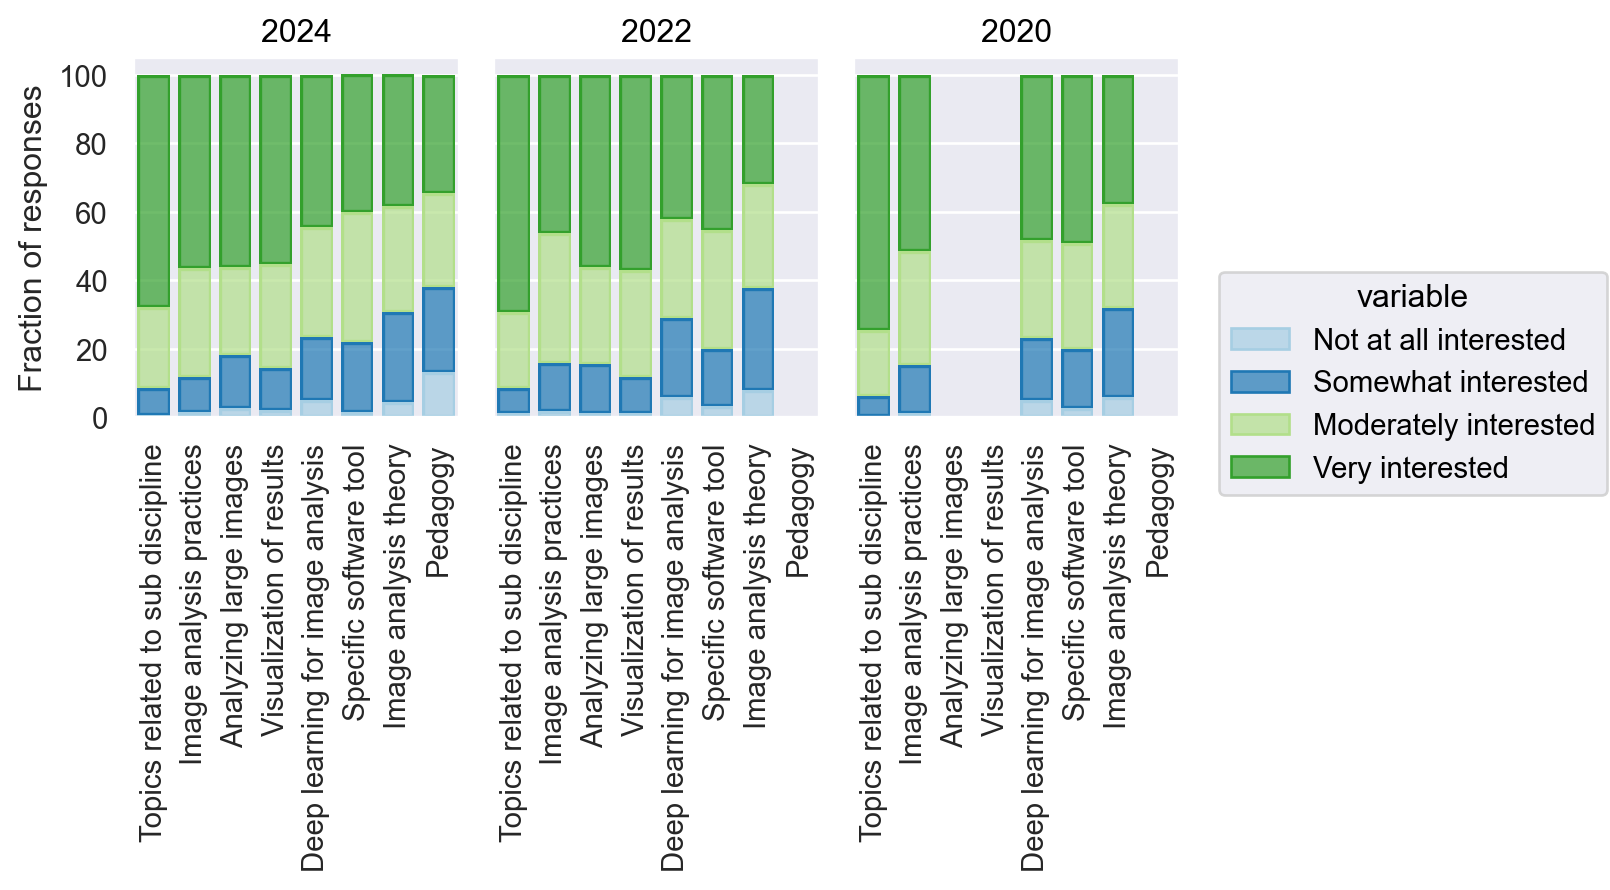

In [72]:
# sort columns by preference of 2024
df = topics_comp.loc[topics_comp['Year']=='2024'] 
df = df.loc[df['variable']=='Very interested'].sort_values('value', ascending=False)
col_order = df['index'].to_list()

topics_comp['variable'] = pd.Categorical(topics_comp['variable'],categories=['Not at all interested', 'Somewhat interested', 'Moderately interested','Very interested'])
topics_comp['index'] = pd.Categorical(topics_comp['index'],categories=col_order)
topics_comp=topics_comp.sort_values('variable')

p = (so.Plot(topics_comp,x='index',y='value', color='variable')
.facet(col='Year', order=['2024', '2022', '2020'])
.add(so.Bar(),so.Stack())
.label(title="{}".format,x="", y="Fraction of responses",)
.scale(color=sns.color_palette("Paired"))
.plot()
)
for axis in p._figure.axes:
    axis.xaxis.set_tick_params(rotation=90)

p.save(loc='figures/Instructional_Topics_across_years.png', bbox_inches="tight")


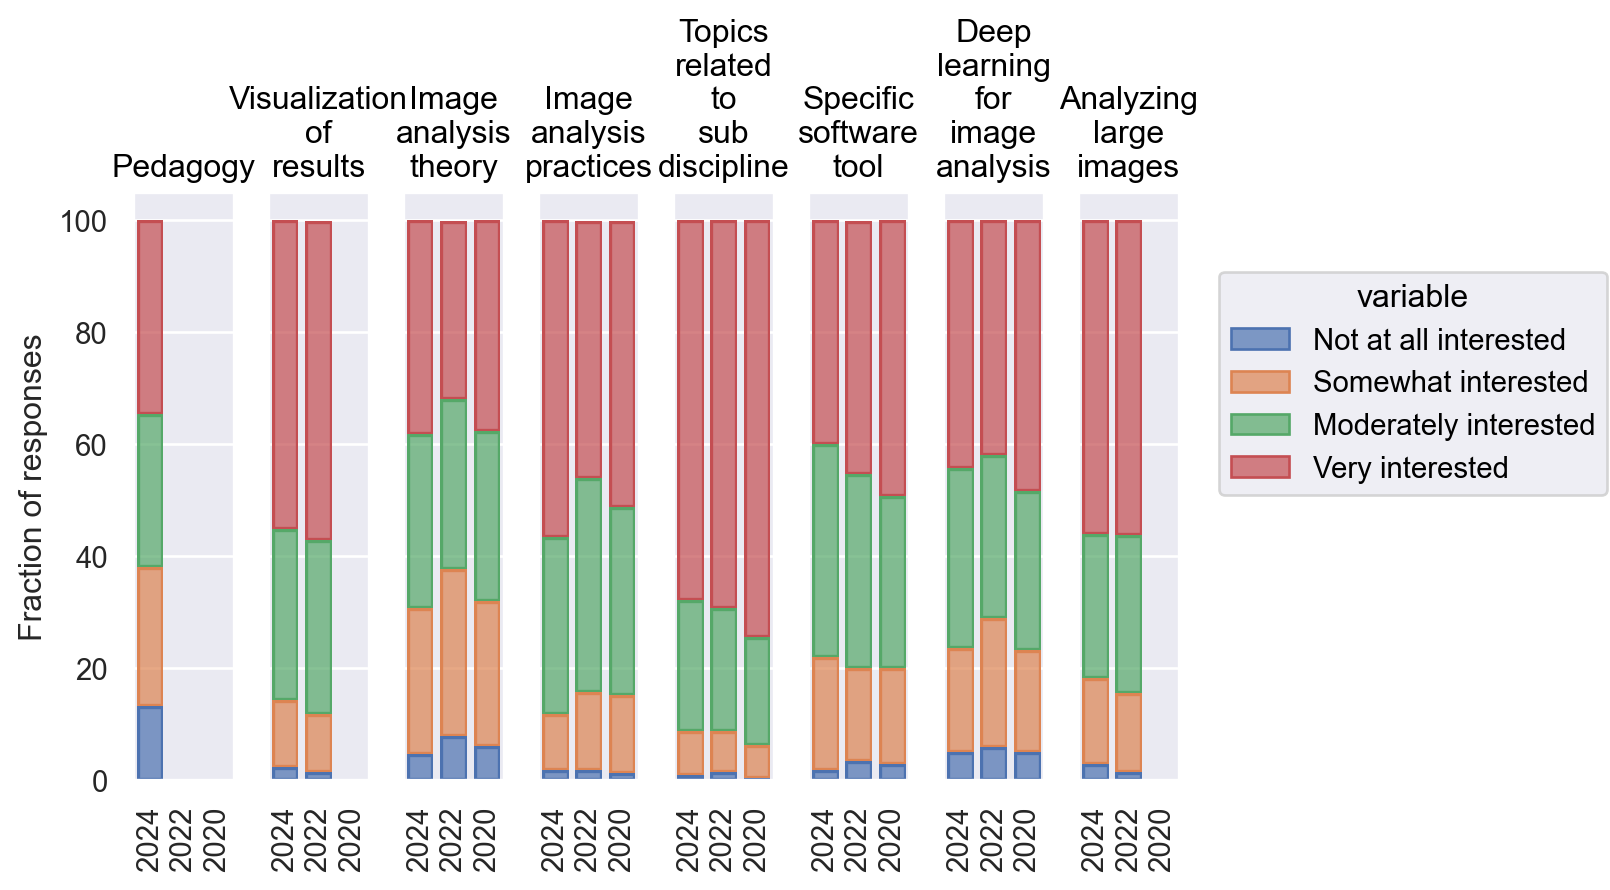

In [73]:
topics_comp['cat_label'] = topics_comp['index'].str.replace(' ','\n')
topics_comp

p = (so.Plot(topics_comp, x='Year', y='value', color='variable')
     .facet(col='cat_label')
     .add(so.Bar(), so.Stack())
     #.scale(x=so.Nominal())
     .label(x="", y="Fraction of responses", title="{}".format)
).plot()
for axis in p._figure.axes:
    axis.xaxis.set_tick_params(rotation=90)

p.save(loc='figures/Instructional_Topics_across_years_byTopic.png', bbox_inches="tight")
